## nba

In [26]:
import pandas as pd

data = pd.read_csv('./04/nba_all_elo.csv')
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [6]:
data.shape

(126314, 23)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [8]:
data.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553


In [10]:
data["lg_id"].value_counts()

lg_id
NBA    118016
ABA      8298
Name: count, dtype: int64

In [11]:
data["team_id"].value_counts()

team_id
BOS    5997
NYK    5769
LAL    5078
DET    4985
PHI    4533
       ... 
PIT      60
INJ      60
TRH      60
DTF      60
SDS      11
Name: count, Length: 104, dtype: int64

In [12]:
data["fran_id"].value_counts()

fran_id
Lakers          6024
Celtics         5997
Knicks          5769
Warriors        5657
Pistons         5650
Sixers          5644
Hawks           5572
Kings           5475
Wizards         4582
Spurs           4309
Bulls           4307
Pacers          4227
Thunder         4178
Rockets         4154
Nuggets         4120
Nets            4106
Suns            4080
Bucks           4034
Trailblazers    3870
Cavaliers       3810
Clippers        3733
Jazz            3555
Mavericks       3013
Heat            2371
Pelicans        2254
Magic           2207
Timberwolves    2131
Grizzlies       1657
Raptors         1634
Hornets          894
Colonels         846
Squires          799
Spirits          777
Stars            756
Sounds           697
Baltimore        467
Floridians       440
Condors          430
Capitols         291
Olympians        282
Sails            274
Stags            260
Bombers          249
Steamrollers     168
Packers           72
Redskins          65
Rebels            63
Water

In [16]:
data.loc[data["fran_id"] == "Lakers", "team_id"].value_counts()

team_id
LAL    5078
MNL     946
Name: count, dtype: int64

In [18]:
data.loc[data["team_id"] == "MNL", "year_id"].max()

np.int64(1960)

In [28]:
data_for_huskies = data[data["fran_id"] == "Huskies"]
data_for_huskies.loc[data_for_huskies["year_id"] == 1947, "pts"].sum()

np.int64(3995)

In [29]:
data_for_huskies.axes

[Index([  0,  10,  24,  26,  49,  50,  64,  69,  83,  91, 104, 120, 124, 147,
        157, 171, 185, 197, 201, 215, 236, 245, 254, 267, 281, 284, 291, 302,
        312, 326, 342, 357, 372, 375, 388, 397, 413, 419, 425, 453, 467, 473,
        479, 490, 502, 513, 526, 528, 538, 547, 557, 559, 575, 576, 587, 603,
        616, 628, 646, 649],
       dtype='int64'),
 Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
        'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
        'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
        'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
       dtype='object')]

## loc / iloc

In [30]:
vocals = pd.Series(["a", "b", "c", "d", "e"], index=[1, 3, 5, 7, 9])
print(vocals)

1    a
3    b
5    c
7    d
9    e
dtype: object


In [34]:
vocals.loc[5]

'c'

In [33]:
vocals.iloc[2]

'c'

In [35]:
data.iloc[-1]

gameorder               63157
game_id          201506170CLE
lg_id                     NBA
_iscopy                     1
year_id                  2015
date_game           6/16/2015
seasongame                103
is_playoffs                 1
team_id                   GSW
fran_id              Warriors
pts                       105
elo_i               1813.6349
elo_n               1822.2881
win_equiv           68.519516
opp_id                    CLE
opp_fran            Cavaliers
opp_pts                    97
opp_elo_i           1700.7391
opp_elo_n           1692.0859
game_location               A
game_result                 W
forecast              0.51855
notes                     NaN
Name: 126313, dtype: object

In [37]:
data.loc[1000:1005, ["fran_id", "team_id"]]

,fran_id,team_id
1000,Capitols,WSC
1001,Baltimore,BLB
1002,Stags,CHS
1003,Celtics,BOS
1004,Knicks,NYK
1005,Bombers,STB


In [43]:
data_after_2012 = data[data["year_id"] > 2012]
data_after_2012.shape

(7888, 23)

In [47]:
data_with_notes = data[data["notes"].notnull()]
data_with_notes.shape

(5424, 23)

In [48]:
# game_id termina en CLE, cuantos son

data_game_id_ends_in_CLE = data[data["game_id"].str.endswith("CLE")]
data_game_id_ends_in_CLE.shape

(3818, 23)

In [52]:
data[
    (data["pts"] > 100) &
    (data["fran_id"] == "Lakers") & 
    (data["_iscopy"] == 0)
]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
1241,621,194811240LAL,NBA,0,1949,11/24/1948,11,0,MNL,Lakers,...,50.642723,PRO,Steamrollers,89,1224.2421,1221.5316,H,W,0.913496,NaN
1450,726,194901050LAL,NBA,0,1949,1/5/1949,28,0,MNL,Lakers,...,54.922226,STB,Bombers,76,1394.3695,1389.1986,H,W,0.834785,NaN
2047,1024,194911200LAL,NBA,0,1950,11/20/1949,9,0,MNL,Lakers,...,56.211605,INO,Olympians,95,1338.6213,1335.2281,H,W,0.889069,NaN
2123,1062,194911300LAL,NBA,0,1950,11/30/1949,13,0,MNL,Lakers,...,55.438377,NYK,Knicks,92,1520.8824,1515.8718,H,W,0.725909,NaN
2547,1274,195001220LAL,NBA,0,1950,1/22/1950,43,0,MNL,Lakers,...,58.967598,CHS,Stags,75,1553.0591,1543.1563,H,W,0.729166,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125413,62707,201502270LAL,NBA,0,2015,2/27/2015,57,0,LAL,Lakers,...,26.521492,MIL,Bucks,93,1534.0658,1521.9550,H,W,0.378873,NaN
125450,62726,201503010LAL,NBA,0,2015,3/1/2015,58,0,LAL,Lakers,...,26.133034,OKC,Thunder,108,1620.3019,1624.5492,H,L,0.284747,NaN
125769,62885,201503220LAL,NBA,0,2015,3/22/2015,68,0,LAL,Lakers,...,24.541954,PHI,Sixers,87,1314.4166,1306.4329,H,W,0.660857,NaN
126052,63027,201504100LAL,NBA,0,2015,4/10/2015,79,0,LAL,Lakers,...,22.371969,MIN,Timberwolves,98,1283.9249,1278.4835,H,W,0.670716,NaN


In [56]:
data["pts"].min()

np.int64(0)

In [59]:
data.groupby("fran_id", sort=True)["pts"].sum()

fran_id
Baltimore        37219
Bombers          17793
Bucks           418326
Bulls           437269
Capitols         22387
Cavaliers       380416
Celtics         626484
Clippers        380523
Colonels         94435
Condors          49642
Denver            4818
Falcons           3797
Floridians       49568
Grizzlies       157683
Hawks           567261
Heat            229103
Hornets          84489
Huskies           3995
Ironmen           3674
Jazz            363155
Jets              4482
Kings           569245
Knicks          582497
Lakers          637444
Magic           219436
Mavericks       309239
Nets            417809
Nuggets         445780
Olympians        22864
Pacers          438288
Packers           6193
Pelicans        220794
Pistons         572758
Raptors         158370
Rebels            4474
Redskins          5372
Rockets         432504
Sails            30080
Sixers          585891
Sounds           75582
Spirits          85874
Spurs           453822
Squires          91127
Sta

In [60]:
data_2 = data.copy()
data_2.shape

(126314, 23)

In [61]:
data["difference_in_points"] = data.pts - data.opp_pts

In [65]:
data.difference_in_points.head()

0    -2
1     2
2    16
3   -16
4   -17
Name: difference_in_points, dtype: int64

In [66]:
data_with_better_names = data.rename(
    columns = {
        "game_result": "result",
        "game_location": "location",
    }
)

In [67]:
data_with_better_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   gameorder             126314 non-null  int64  
 1   game_id               126314 non-null  object 
 2   lg_id                 126314 non-null  object 
 3   _iscopy               126314 non-null  int64  
 4   year_id               126314 non-null  int64  
 5   date_game             126314 non-null  object 
 6   seasongame            126314 non-null  int64  
 7   is_playoffs           126314 non-null  int64  
 8   team_id               126314 non-null  object 
 9   fran_id               126314 non-null  object 
 10  pts                   126314 non-null  int64  
 11  elo_i                 126314 non-null  float64
 12  elo_n                 126314 non-null  float64
 13  win_equiv             126314 non-null  float64
 14  opp_id                126314 non-null  object 
 15  

In [68]:
data_without_missing_data = data.dropna()

In [69]:
data_without_missing_data.shape

(5424, 24)

In [70]:
data_with_default_values = data.copy()
data_with_default_values["notes"].fillna(value="NO DATA", inplace=True)

/tmp/ipykernel_92492/2908814836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_with_default_values["notes"].fillna(value="NO DATA", inplace=True)


In [71]:
data_with_default_values["notes"].describe()

count      126314
unique        232
top       NO DATA
freq       120890
Name: notes, dtype: object

<Axes: xlabel='year_id'>

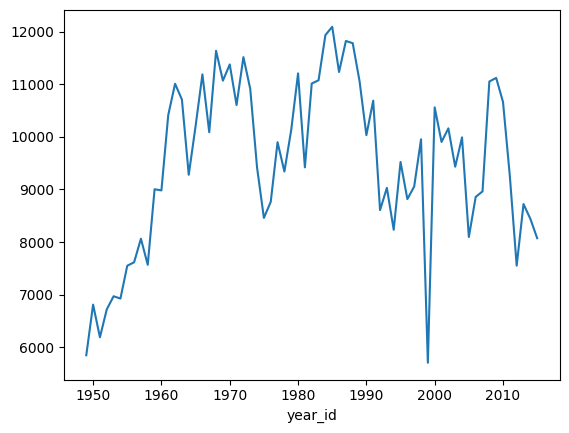

In [75]:
%matplotlib inline
data[data["fran_id"] == "Lakers"].groupby("year_id")["pts"].sum().plot()

<Axes: xlabel='year_id'>

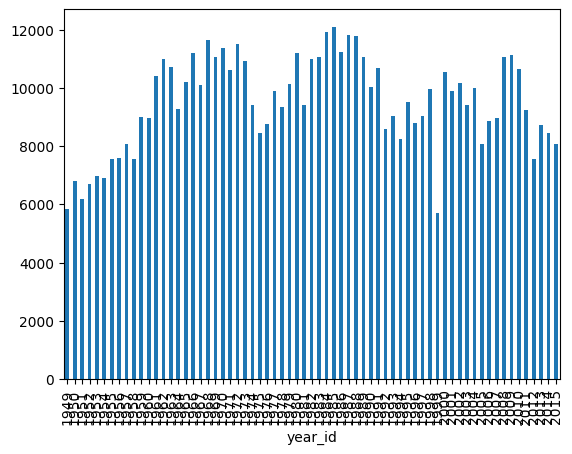

In [76]:
%matplotlib inline
data[data["fran_id"] == "Lakers"].groupby("year_id")["pts"].sum().plot(kind="bar")

In [ ]:
# escoge o transforma las variables del dataset
# y grafica la matriz de correlación
# y suponiendo que mi variable Y es el game_result
# que variables usarias, por que
# que tipo de modelo usarias (https://scikit-learn.org/stable/machine_learning_map.html)
# haga el modelo

# 90 minutos